In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition

In [118]:
n_neurons = 50
n_times = 100
d_max = 5

cases = ['sync linear', 'async', 'white noise', 'spiral']

data = {x: np.zeros((n_neurons, n_times)) for x in cases}
data['sync linear'][:40, 10:20] = np.arange(2 * d_max)[np.newaxis, :] - d_max
for i in range(40):
    data['async'][i, i] = d_max
data['white noise'][:40, 10:20] = np.random.randn(40, 10) * d_max

# make spiral
n_rots = 3
T = 200
spiral_size = np.minimum(n_neurons, n_times) - 2
t_arr = np.arange(T) + 1
a = 0.5 * spiral_size / T
b = 2 * np.pi * n_rots / T
y0, x0 = n_times / 2, n_neurons / 2
for t in t_arr:
    r, theta = a * t, b * t
    x = int(np.round(r * np.cos(theta) + x0))
    y = int(np.round(r * np.sin(theta) + y0))
    data['spiral'][x, y] = d_max

for name in cases:
    data[name] = data[name] + np.random.randn(n_neurons, n_times) * 0.3

In [119]:
pca = {}
for name in cases:
    pca[name] = sklearn.decomposition.PCA(n_components=15)
    pca[name].fit(data[name].T)
#     print(f'Shape PCA components: {pca[name].components_.shape}')

#     pca.explained_variance_ratio_

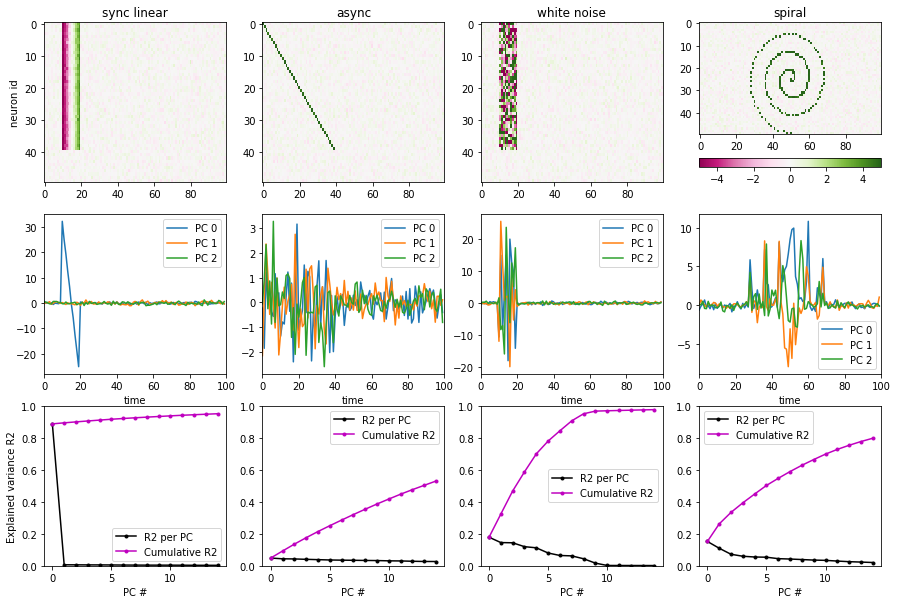

In [120]:
plt.rcParams['figure.figsize'] = (15, 10)

for i_col, name in enumerate(cases):

    plt.subplot(3, len(data), i_col + 1)
    plt.imshow(data[name], aspect='auto', cmap='PiYG', vmin=-d_max, vmax=d_max)
    # plt.colorbar()
    plt.title(name)
    if i_col == 0:
        plt.ylabel("neuron id")
    if i_col == len(data) - 1:
        plt.colorbar(orientation='horizontal')
    
    plt.subplot(3, len(data), i_col + 1 + len(data))
    for i_pca in range(3):
        plt.plot(np.dot(pca[name].components_, data[name])[i_pca, :].T, label=f'PC {i_pca}');
    plt.legend()
    plt.xlim([0, 100])
    plt.xlabel('time')
    
    plt.subplot(3, len(data), i_col + 1 + 2 * len(data))
    plt.plot(pca[name].explained_variance_ratio_, '.-', c='k', label='R2 per PC')
    plt.plot(np.cumsum(pca[name].explained_variance_ratio_), '.-', c='m', label='Cumulative R2')
    plt.xlabel('PC #')
    plt.legend()
    plt.ylim([0, 1])
    
    if i_col == 0:
        plt.ylabel('Explained variance R2')
        